In [49]:
import pandas    as pd
import geopandas as gpd
import matplotlib 

In [20]:
gpkg_file = 'dados/bcim_2016_21_11_2018.gpkg'
ufs = gpd.read_file(gpkg_file, layer='lim_unidade_federacao_a')
ufs = ufs[['sigla','geometry']]

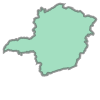

In [21]:
ufs.geometry[3]

In [19]:
ufs[['sigla','geometry']]
print(ufs.crs)

epsg:4674


In [26]:
drones = pd.read_csv('dados/sisant.zip', sep=';', encoding='cp1252', skiprows=1,low_memory=False)
#drones.head()

#drones['Código Aeronave'].unique


<bound method Series.unique of 0        PP- 40211550
1        PP-000000001
2        PP-000000003
3        PP-000000005
4        PP-000000006
             ...     
86537    PR-999999966
86538    PR-999999980
86539    PR-999999990
86540    PR-999999994
86541    PR-999999999
Name: Código Aeronave, Length: 86542, dtype: object>

In [38]:
drones['uf'] = drones['Cidade-Estado'].apply(lambda x: str(x).split('-')[-1])
drones_ufs = drones.groupby(['uf']).size().reset_index(name='quantidade')
drones_ufs

,uf,quantidade
0,,128
1,AC,143
2,AL,473
3,AM,943
4,AP,152
5,Aerocinematografia,4
6,BA,3442
7,CE,1748
8,DF,2880
9,ES,1661


In [45]:
drones_ufs_br = ufs.merge(drones_ufs, left_on='sigla', right_on ='uf')
#drones_ufs_br.drop('sigla', index='columns', inplace=True)
drones_ufs_br = drones_ufs_br[['uf', 'geometry', 'quantidade']]

In [46]:
drones_ufs_br

,uf,geometry,quantidade
0,GO,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",2577
1,MS,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",1462
2,PR,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",5715
3,MG,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",9006
4,SE,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",792
5,AL,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...",473
6,TO,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...",358
7,RR,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...",214
8,AM,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...",943
9,AC,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...",143


<AxesSubplot:title={'center':'Quantidades de Drones por Unidade da Federação (totais)'}>

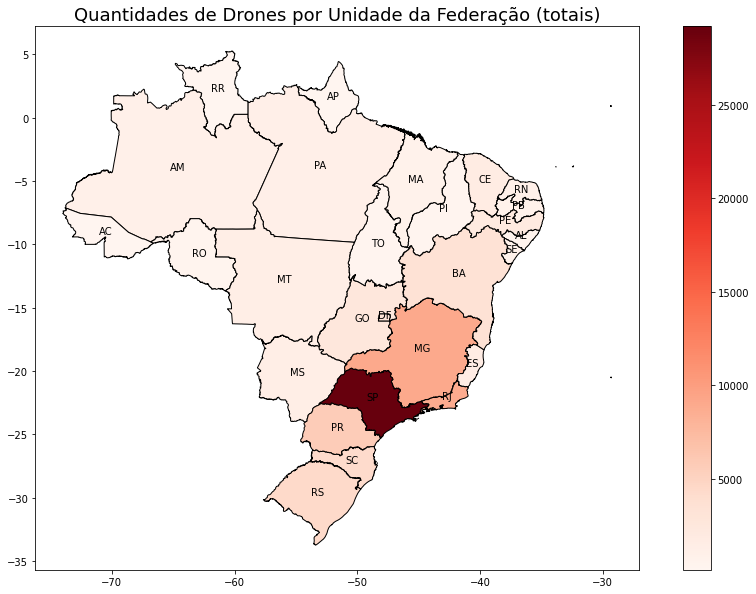

In [59]:
%matplotlib inline

ax = drones_ufs_br.plot(
    column  = 'quantidade',
    cmap    = 'Reds',
    figsize = (16,10),
    legend  = True,
    edgecolor = 'black'
)

ax.set_title(label='Quantidades de Drones por Unidade da Federação (totais)',
             fontsize=18,
             
            )

drones_ufs_br.apply(lambda x: ax.annotate(text=x.uf, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax
